# Data Story Telling, Exploratory Data Analysis & Inferential Statistics
# _Factors affecting vessel delays at US Army Corps of Engineers-managed locks on US waterways._

## Springboard Data Science Career Track, Capstone 2
***
* Author: Heather A. Passmore
* Data: United States Army Corps of Engineers, Lock Performance Management System
* Capstone Description: Project Proposal (add link)
* Initial Data Approach: Data Wrangling (create, add link)
***
## Table of Contents
1. Import Merged Dataframes & Check Descriptive Statistics
2. Define Delay & Explore Patterns 
3. Heading

## 1. Import Merged Dataframes & Check Descriptive Statistics

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import pickle
import scipy.stats
from scipy.stats import norm
import scipy as sp

# Figures inline, visualization style
%matplotlib inline

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

In [3]:
# Bring traf_sample dataframe into workspace: random sample ~ 2000 rows per lock over 5 years
# load the pickled traffic_2013_2017 DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/traffic_5yr_sample.pickle','rb') as f:
    traf_sample = pickle.load(f)

In [4]:
# Bring barge_flot_vessel dataframe into workspace
# load the pickled traffic_2013_2017 DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/barge_flot_vessel.pickle','rb') as f:
    barge_flot_vessel = pickle.load(f)

In [5]:
# Bring stall_stop_2013_2017_descriptors dataframe into workspace
# load the pickled traffic_2013_2017 DataFrame from hard drive in 'rb' mode
with open('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/stall_stop_2013_2017_descriptors.pickle','rb') as f:
    stoppage_descriptors = pickle.load(f)

In [27]:
rivermstr = pd.read_csv('/Users/pgagnon/Documents/Springboard/springboard/Capstone_2/LockData/RIVERMSTR.csv', 
                    index_col=None, header = 0)

In [6]:
# check the summary statistics of numerical fields
traf_sample.describe()

,LOCK_NO,CHMBR_NO,VESSEL_NO,NUM_CMRCL_PASSGRS,LINE_SEQ_NO,entry_time,exit_time,delay_time
count,392000.000000,392000.000000,3.920000e+05,54260.000000,392000.000000,281459.000000,281561.000000,392000.000000
mean,20.397120,1.292842,1.783938e+09,19.514965,499870.883867,8.858892,11.049684,108.612217
std,22.160452,0.801119,1.356117e+09,78.109511,287824.347127,8.172415,22.143275,657.296516
min,1.000000,1.000000,4.300830e+05,0.000000,3.000000,1.000000,1.000000,0.000000
25%,4.000000,1.000000,4.358892e+08,0.000000,250233.750000,3.000000,4.000000,0.000000
50%,12.000000,1.000000,1.649363e+09,2.000000,501994.500000,7.000000,8.000000,5.000000
75%,26.000000,1.000000,2.996234e+09,9.000000,745255.250000,12.000000,15.000000,64.000000
max,99.000000,5.000000,4.293307e+09,5140.000000,999995.000000,1090.000000,4325.000000,87870.000000


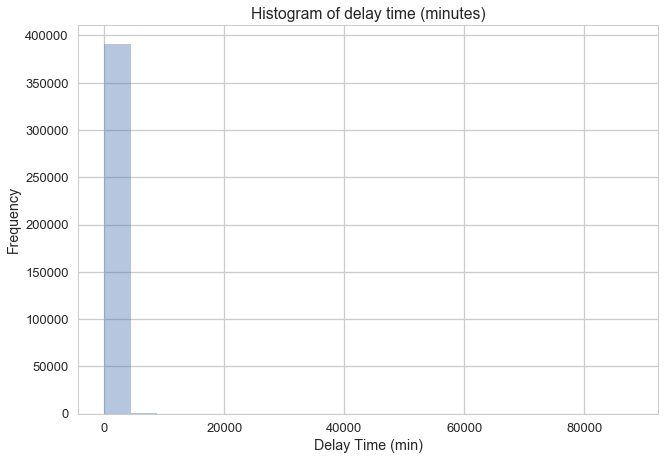

In [8]:
# view a histogram of delay_time
sns.distplot(traf_sample.delay_time, bins=20, kde=False, rug=False);
plt.title('Histogram of delay time (minutes)');
plt.xlabel('Delay Time (min)');
plt.ylabel('Frequency');

In [11]:
# Log transform 'delay_time' to view all data on histogram (raw data too skewed)
traf_sample = traf_sample.assign(log_delay = lambda x: np.log(x.delay_time + 1))

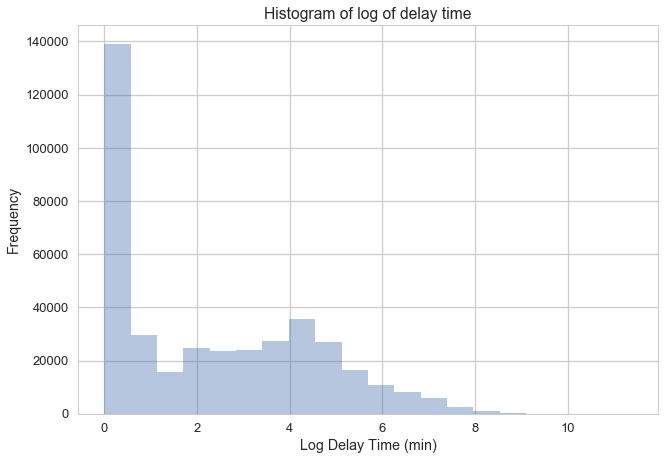

In [13]:
# view a histogram of log of delay_time
sns.distplot(traf_sample.log_delay, bins=20, kde=False, rug=False);
plt.title('Histogram of log of delay time');
plt.xlabel('Log Delay Time (min)');
plt.ylabel('Frequency');

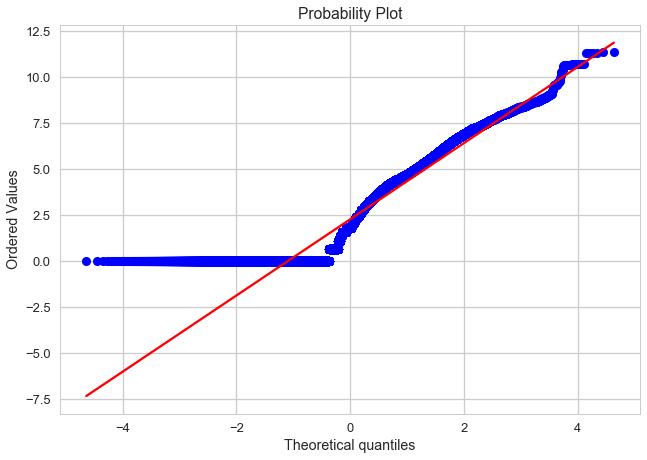

In [14]:
# check normality with Q-Q plot
scipy.stats.probplot(traf_sample.log_delay, dist='norm', fit=True, plot=plt);

## 2. Define Delay & Explore Patterns

In [15]:
# Define Delay: Because the 75th percentile is 64 minutes define delay as > 65 minutes
traf_sample['delay'] = traf_sample['delay_time'].apply(lambda x: x > 65)

In [16]:
traf_sample.head()

,EROC,RIVER_CODE,LOCK_NO,CHMBR_NO,OPS_ID,LOCKAGE_TYPE,VESSEL_NO,VESSEL_FUNCTION_TYPE,FLOTILLA_NO,ARRIVAL_DATE,...,NUM_CMRCL_PASSGRS,ASST_CODE,SIGNAL_DATE,DEPARTURE_DATE,LINE_SEQ_NO,entry_time,exit_time,delay_time,log_delay,delay
2093451,H2,OH,75,2,L5608584,S,2246973225,T,L3435504,2014-05-07 05:37:00,...,NaN,NaN,NaT,NaT,821558,10.0,14.0,10.0,2.397895,False
5791,M5,MK,22,1,L7532719,C,967995540,T,L4611089,2017-04-06 00:40:00,...,NaN,NaN,NaT,NaT,912730,30.0,8.0,0.0,0.000000,False
1234536,M3,GI,14,1,L6150873,O,3171419219,T,L3767838,2015-02-10 20:00:00,...,NaN,NaN,NaT,NaT,838438,NaN,NaN,66.0,4.204693,True
1391794,H4,MN,25,1,L6581479,S,2064406338,T,L4017674,2015-09-20 02:20:00,...,NaN,NaN,NaT,NaT,362970,10.0,5.0,20.0,3.044522,False
638365,M3,GI,13,1,L7255211,O,1088709797,T,L4420842,2016-10-01 01:08:00,...,NaN,NaN,NaT,NaT,810510,NaN,NaN,67.0,4.219508,True


In [17]:
# count number of delays
traf_sample['delay'].value_counts()

False    295744
True      96256
Name: delay, dtype: int64

In [20]:
# calculate percent of lock delays
no_delay = traf_sample['delay'].value_counts()[0] # first value of the result above
delay = traf_sample['delay'].value_counts()[1] # second value of the result above
total_lockage = no_delay + delay # total count of lockage events
print(float(delay) / total_lockage) # converting to float to get a float result

0.245551020408


In [23]:
# groupby EROC to see counts by Engineer Reporting Office Code (Corps division & district)
group_by_EROC = traf_sample.groupby(['EROC','delay'])

In [24]:
# view categories by size and unstack by EROC
count_delays_by_eroc = group_by_EROC.size().unstack()
count_delays_by_eroc

delay,False,True
EROC,,
B2,43244,22734
B3,6921,7784
B4,4630,131
B5,27037,20550
B6,18895,4689
E3,1531,9
E4,3403,34
G2,3476,266
G3,9159,93


In [25]:
# groupby River_Code to see counts by River
group_by_river = traf_sample.groupby(['RIVER_CODE','delay'])

In [26]:
# view categories by size and unstack by RIVER_CODE
count_delays_by_river = group_by_river.size().unstack()

delay,False,True
RIVER_CODE,,
AG,5307.0,155.0
AI,2689.0,8.0
AL,131.0,1.0
AP,130.0,1.0
AT,1877.0,3.0
BR,1030.0,2.0
BW,5736.0,276.0
CA,2743.0,7.0
CH,10516.0,5.0


In [32]:
# Merge count_delays_by_river with rivermstr to provide river names
count_delays_rivername = pd.merge(count_delays_by_river, rivermstr, how='left', on=['RIVER_CODE'])
count_delays_rivername
# this didn't work. What approach is correct?
rivermstr

,RIVER_CODE,RIVER_NAME
0,AG,ALLEGHENY RIVER
1,AI,ATLANTIC INTRACOASTAL WATERWAY
2,AL,ALABAMA-COOSA RIVERS
3,AP,APLCHCLA/CHATTAHO/FLINT RIVERS
4,AT,ATCHAFALAYA RIVER
5,BR,BLACK ROCK CH/TONAWANDA HARBOR
6,BT,BAYOU TECHE
7,BW,BLACKWARRIOR/TOMBIGBEE RIVERS
8,CA,CALCASIEU RIVER
9,CH,CHICAGO RIVER


In [34]:
# groupby LOCKAGE_TYPE to see counts by LOCKAGE_TYPE
group_by_LOCKAGE = traf_sample.groupby(['LOCKAGE_TYPE','delay'])

In [36]:
# view categories by size and unstack by LOCKAGE_TYPE
# A = Barges After Tow, B = Barges Before Tow, C = Consecutive, F = Fast Double
# J = Jacknife, K = Knockout, N = Navigable Pass, O = Open Pass, S = Straight
# T = Barge Transfer, V = Setover, Z = other
count_delays_by_lockage = group_by_LOCKAGE.size().unstack()
count_delays_by_lockage

delay,False,True
LOCKAGE_TYPE,,
A,9,3
B,4381,6011
C,20773,32294
F,520,103
J,9,10
K,9413,2351
N,9535,1174
O,36866,12264
S,213415,41575
